# Fitness center "Bodybuilder-datascientist" against truants and snowdrops

A common problem faced by fitness clubs and other services is customer churn.  

We have gathered data from customer surveys and decided to work on predicting when a person is likely to stop using our services. Our goal is to identify the factors that enable a client to continue their workouts, allowing us to anticipate that they will renew their contract.  

Since most clients simply stop attending and eventually fail to renew their contracts, it is more cost-effective to retain existing clients than to attract new ones. Moreover, during periods of decline when there are fewer people in the facilities, providing additional reminders can make it easier for individuals to return to their fitness routine.

    Our goals:
     learn how to predict the probability of outflow (at the level of the next month) for each client;
     form typical client portraits: identify several of the most striking groups and characterize their main properties;
     analyze the main features that most strongly affect the outflow;
     formulate the main conclusions and develop recommendations for improving the quality of work with clients:
         1) identify target customer groups;
         2) propose measures to reduce churn;
         3) determine other features of interaction with customers.

## Import Libraries and Data Load


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans

import itertools

In [2]:
def first_check(dataframe):  #standard baseline dataframe check function
     (display('Table cap:'),
            display(dataframe.head(5)),
            display('__________________________________________________ '),
            display(' '),
            display('Table info:'),
            display(dataframe.info()),
            display('__________________________________________________ '),
            display(' '),
            display('Method Describe:'),
            display(dataframe.describe()),
            display('__________________________________________________ '),
            display(' '),
            display('Numbers of duplicates:'),
            display(dataframe.duplicated().sum()))

In [3]:

df = pd.read_csv('D:/Dima_study/Project_practicum/to_git/Project_Fitness-center_Churnrate_machine_learning/dataset/gym_churn.csv')
first_check(df)

'Table cap:'

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


'__________________________________________________ '

' '

'Table info:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

'__________________________________________________ '

' '

'Method Describe:'

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


'__________________________________________________ '

' '

'Numbers of duplicates:'

0

The data is generally well presented, there are no gaps. There are no obvious duplicates.  
26.5% fall off - that seems like quite a lot.  
The average age (and the median, which is already strange, which is close) is 29 years.  
Quality base, 90% have a phone number  
48% are club partners, which means that half work nearby and 84% live nearby.  
Lifetime - The time since the first call is also very close to the median and average. 3 and 3.7 months, respectively.  
And here, it is clearly seen that the median of all contracts is 1 month, and the average is 4.5 months. That is, the majority conclude an agreement not for a year, but for a month, and if they do not come in the next, then this is a problem. Since if there were many annual contracts, it would make life easier.  
additional charges and mean and median are also close 146 and 136. However, the standard deviation is 96, which shows a very large spread in this value.  
The average frequency of visits per week for the entire time since the beginning of the subscription is less than two times - 1.83  
Avg_class_frequency_current_month is the average frequency of visits per week for the previous month and this value is slightly less than 1.76.  

    Client data for the previous month before checking the outflow fact:
         'gender' - gender;
         'Near_Location' - living or working in the area where the fitness center is located;
         'Partner' - an employee of the club's partner company (cooperation with companies whose employees can receive discounts on a subscription - in this case, the fitness center stores information about the client's employer);
         Promo_friends — the fact of the initial registration as part of the "bring a friend" promotion (used a promo code from a friend when paying for the first subscription);
         'Phone' — presence of a contact phone;
         'Age' - age;
         'Lifetime' is the time since the first access to the fitness center (in months).
    Information based on the log of visits, purchases and information about the current status of the client's subscription:
         'Contract_period' — duration of the current active subscription (month, 6 months, year);
         'Month_to_end_contract' — term until the end of the current active subscription (in months);
         'Group_visits' — the fact of attending group classes;
         'Avg_class_frequency_total' — the average frequency of visits per week for the entire time since the start of the subscription;
         'Avg_class_frequency_current_month' — average frequency of visits per week for the previous month;
         'Avg_additional_charges_total' — total revenue from other services of the fitness center: cafe, sporting goods, cosmetic and massage salon.
    'Churn' — churn fact in the current month.

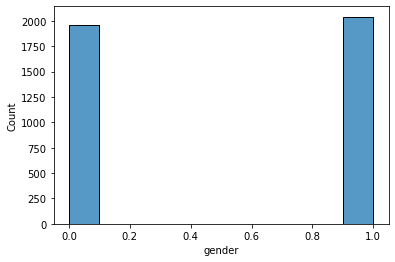

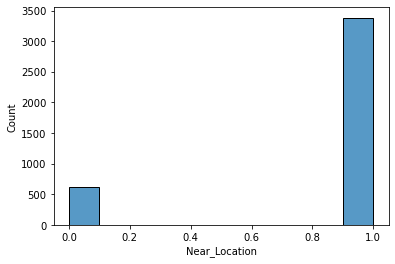

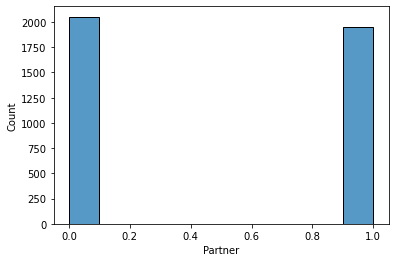

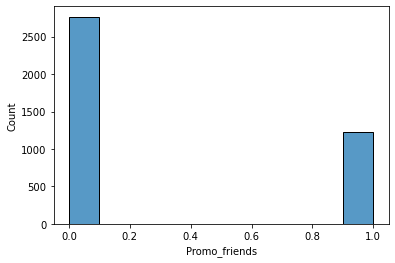

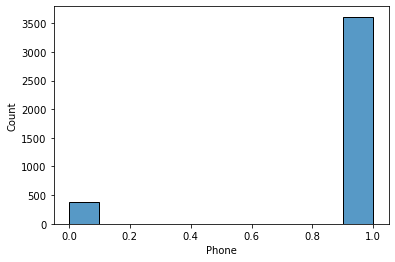

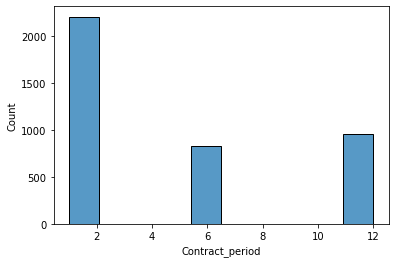

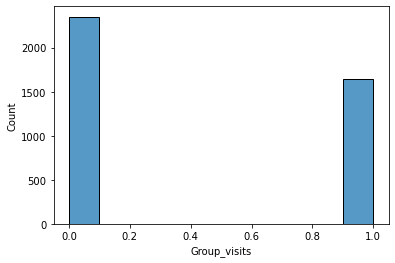

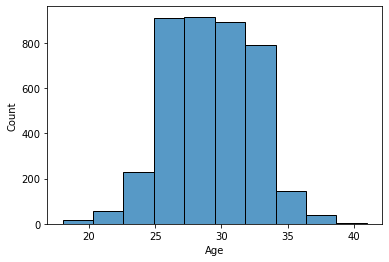

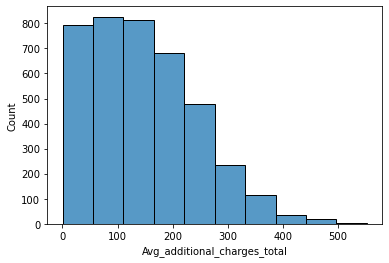

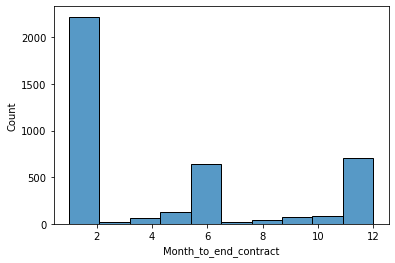

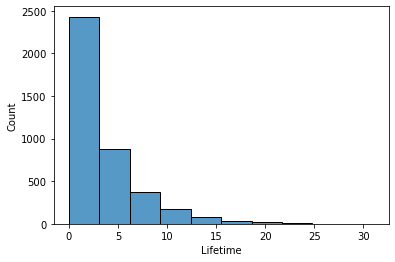

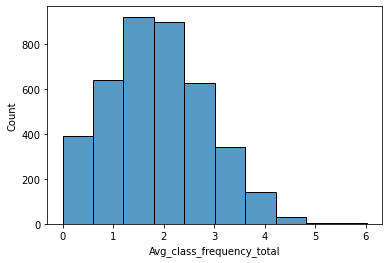

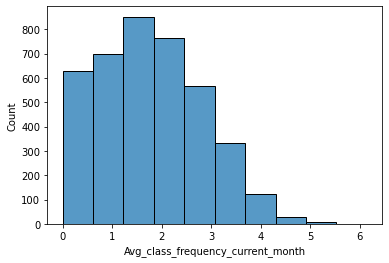

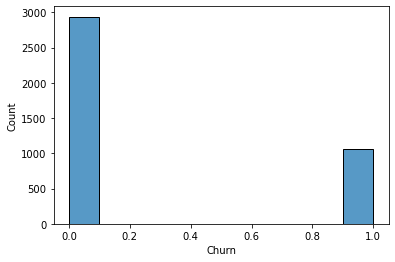

In [4]:
for feature in df.columns:
    sns.histplot(df[feature], bins=10)
    plt.show() 

The data is fairly uniform, and normally distributed.

## Exploratory Data Analysis (EDA)

###  The average values of features in two groups - those who left in the outflow and those who remained


In [5]:
df.groupby('Churn').agg('mean').T

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


We see that the following positions differ significantly. Most interestingly, the average overall frequency differs, maybe not too noticeably, 1.5 times a week versus twice a week, but in the last month their frequency has dropped to once a month. this may be a good benchmark.  
If we see that the average life cycle is one month, respectively, two groups can be assumed, those who first came and will not be extended.  
And they are usually younger, they attend group classes less often, there are three times less months until the end of the contract than those who renew, but we don’t know for sure, the person who bought the annual subscription - he will still walk, maybe we won’t find out until the end.  
They live side by side a little less often 76% versus 87%.  
Athletes from partner companies are more stable and about half of those who continue to walk, while a third of those who have fallen off.  
Fall off twice as rarely as those that came through the action bring a friend.

### Bar graphs and feature distributions for those who left (outflow) and those who stayed (did not get into outflow);

In [6]:
numeric_columns= ['Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 
                  'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month'] 

In [7]:
category_columns=['gender', 'Near_Location', 'Partner', 
                  'Promo_friends', 'Phone', 'Group_visits'] 



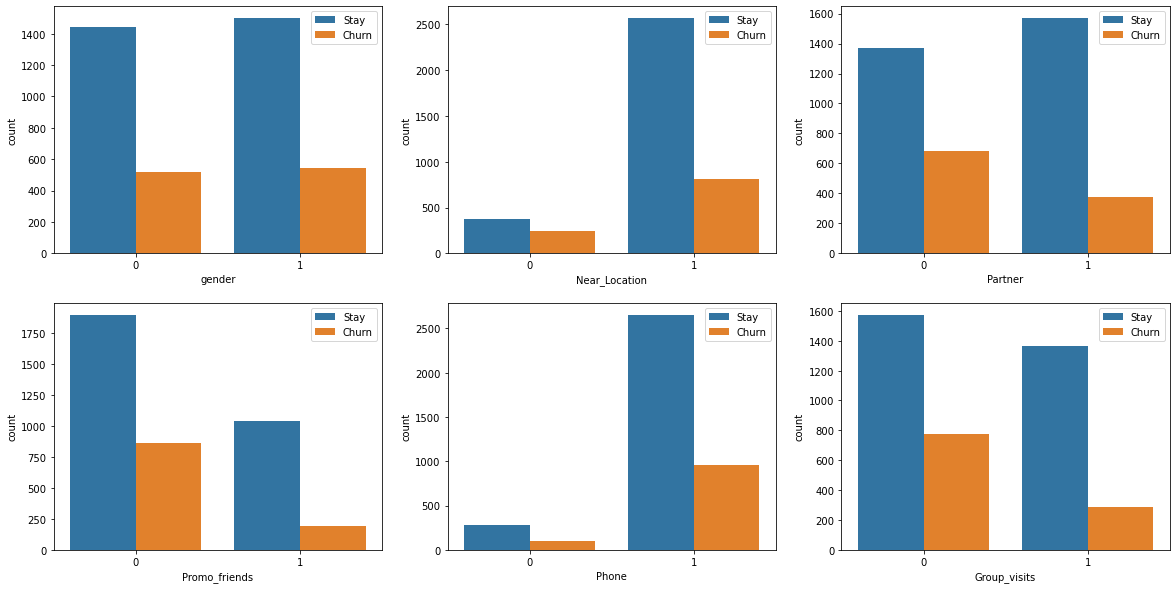

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axes_list = [item for sublist in axes for item in sublist]
for column in df.columns:
    if column in category_columns:
        ax = axes_list.pop(0)
        sns.countplot(x = df[column], data=df, ax=ax, hue=df['Churn'])
        ax.legend(['Stay', 'Churn'])

In categorical columns, you can see a large proportion of one or another parameter. You can continue. Those who live nearby are much larger than those who are not, and the share of those who quit is visually larger than the share of those who live nearby.  
Athletes from partner companies are more stable and about half of those who continue to walk, while a third of those who have churn.  
Churn twice as rarely as those that came through the action bring a friend.  
The presence of a telephone is again not a criterion.  
Also, those who attend group classes churn about half as much.

<Figure size 864x288 with 0 Axes>

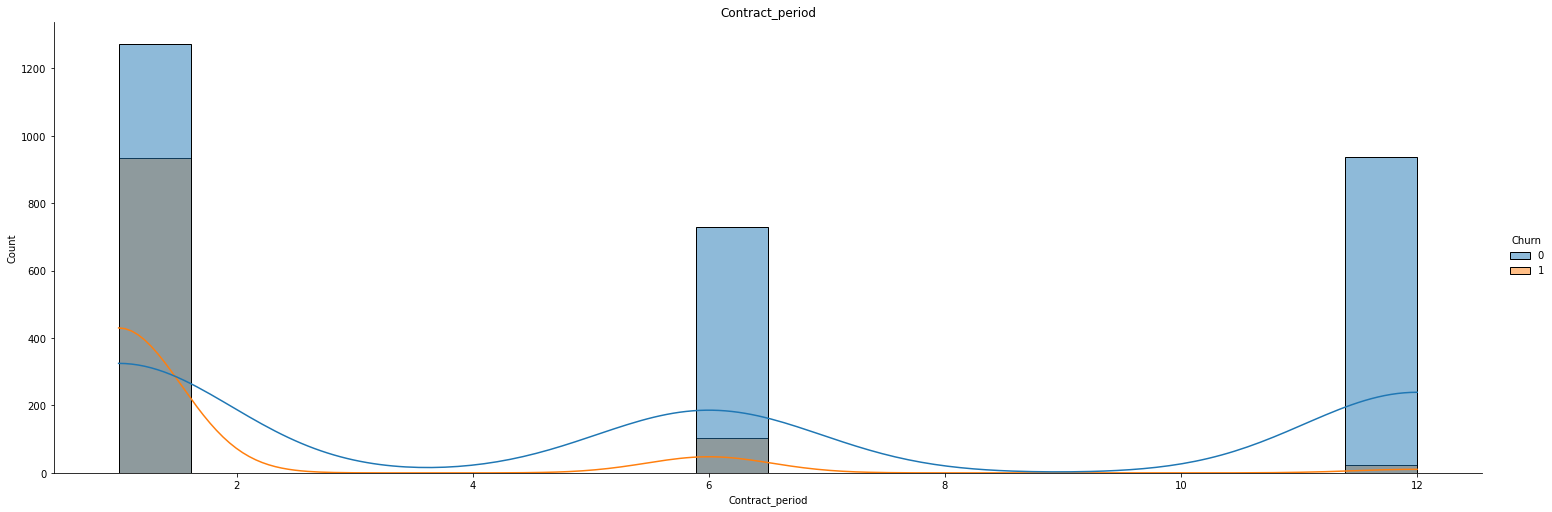

<Figure size 864x288 with 0 Axes>

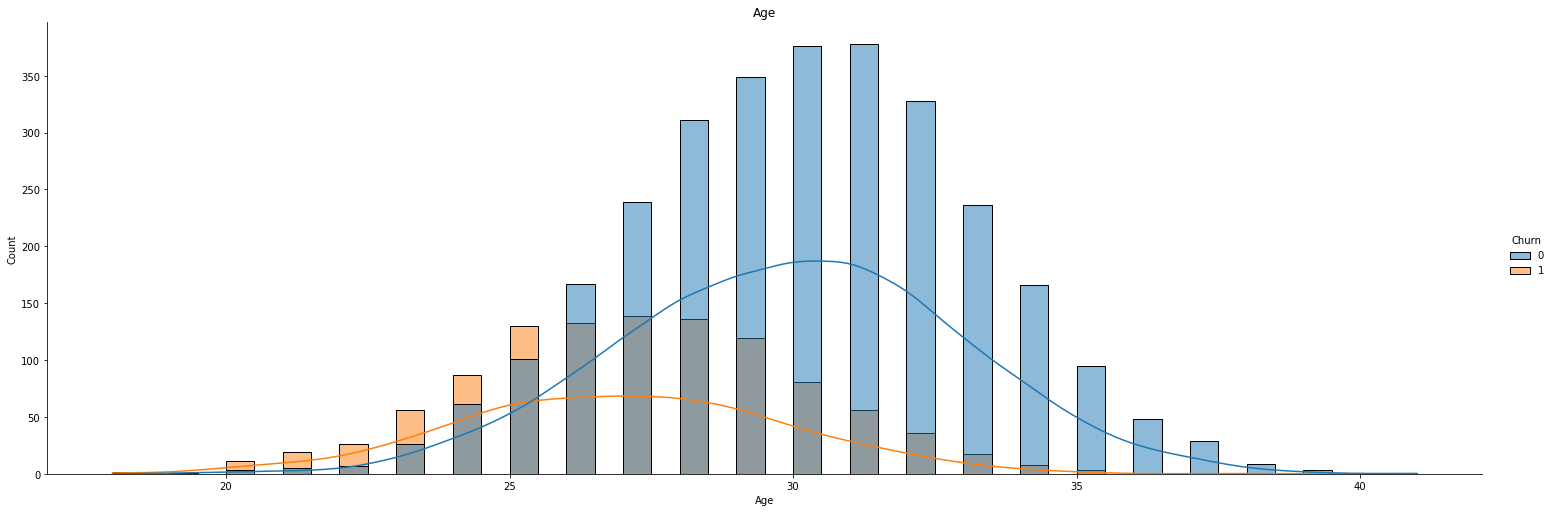

<Figure size 864x288 with 0 Axes>

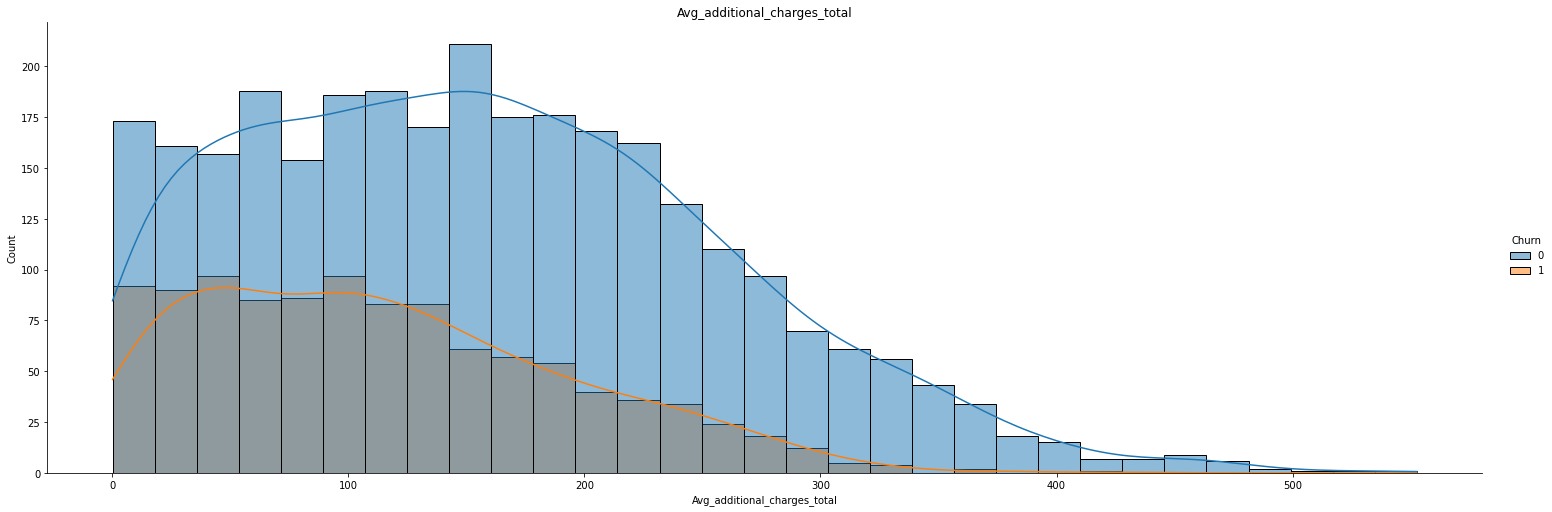

<Figure size 864x288 with 0 Axes>

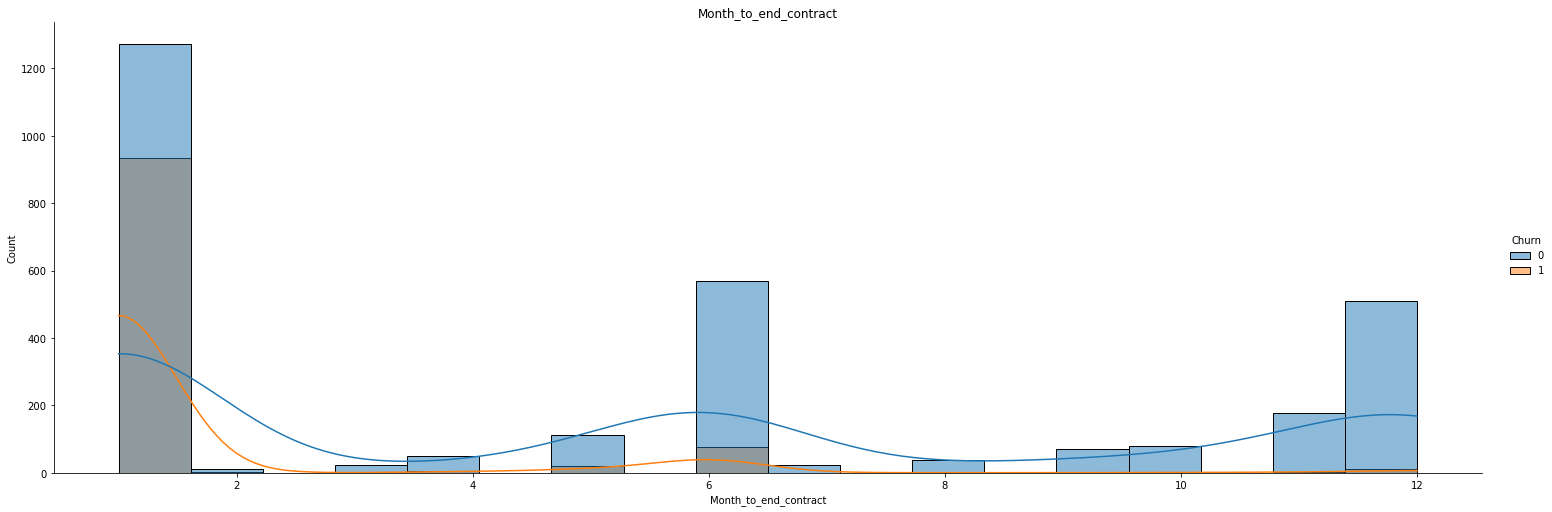

<Figure size 864x288 with 0 Axes>

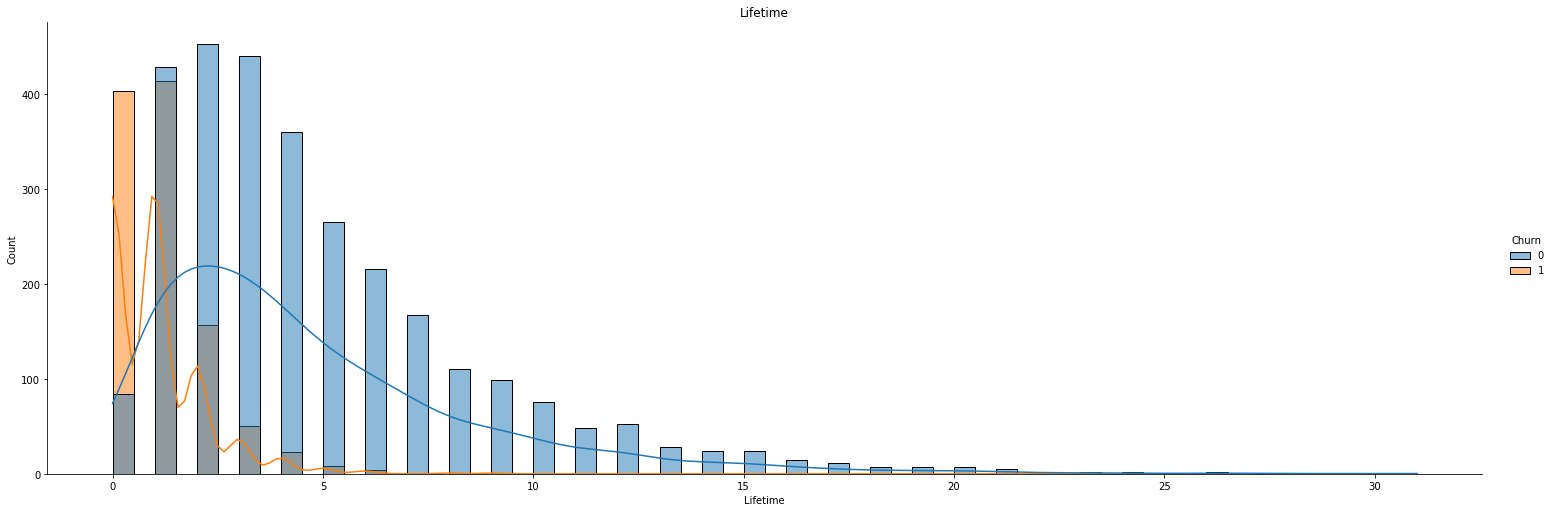

<Figure size 864x288 with 0 Axes>

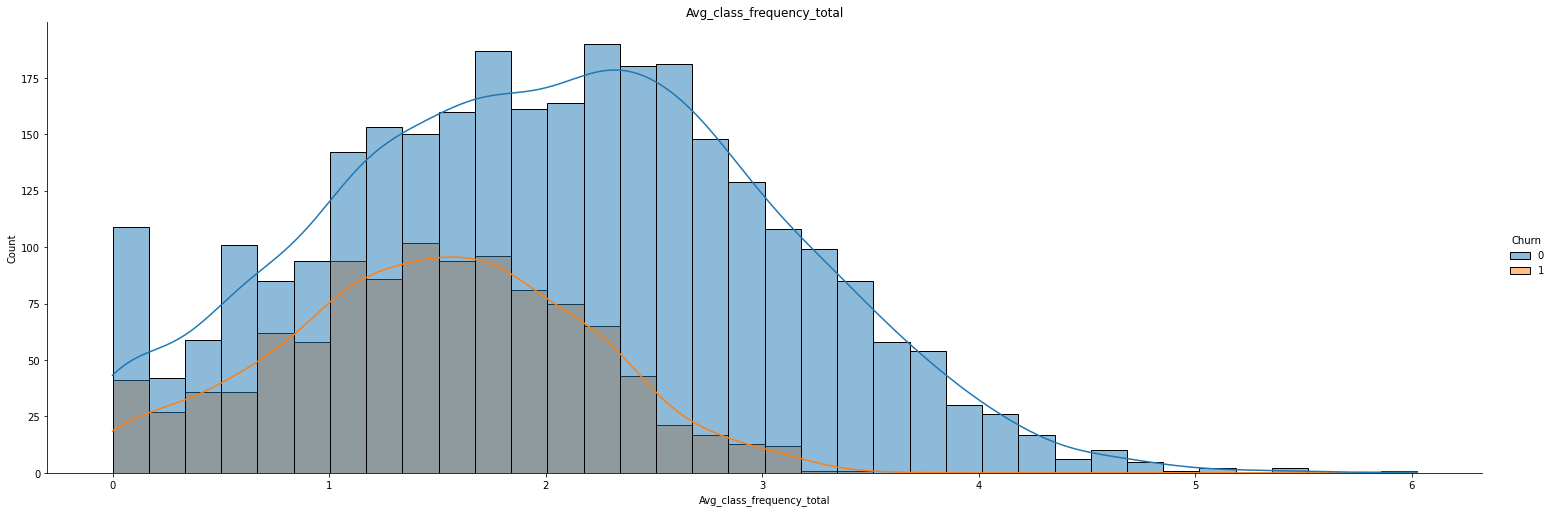

<Figure size 864x288 with 0 Axes>

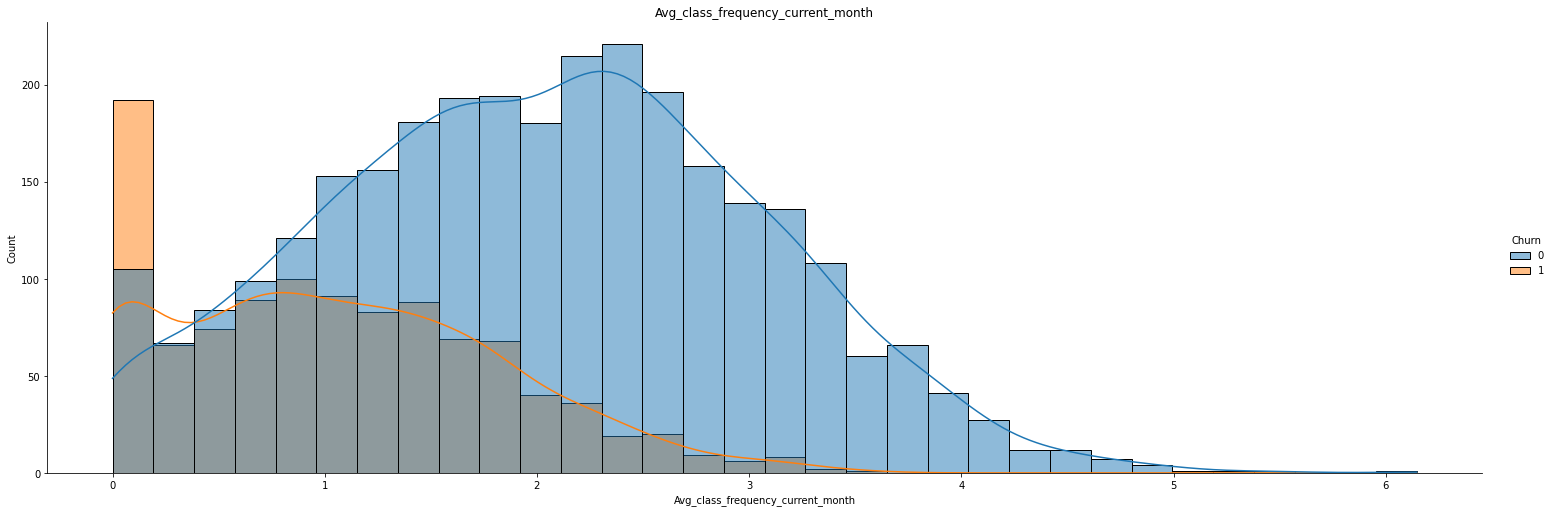

In [9]:
for column in numeric_columns:
    plt.figure(figsize=(12, 4))
    sns.displot(x=df[column], hue="Churn", data=df,kde=True, height=7, aspect=3)
    #sns.kdeplot(x=df[column], hue="Churn", data=df, )
    plt.title(column)
    plt.show();

We observe that those who have a contract signed for 1 month fall off more often. Those who are longer are still difficult to guess. The age of those who throw is more shifted to the left, which means that a younger cohort of people throws more often. Customers who leave us are less accustomed to leaving money.  
The life span of 1 month is the most prominent indicator. So they leave mostly in the first two months.  

The average by the number of visits for the last month has a sharp drop in value to the previous indicator.  

1.5 times a week, versus twice a week, but in the last month their frequency has dropped to once a month. this may be a good benchmark.  

###  Correlation matrix

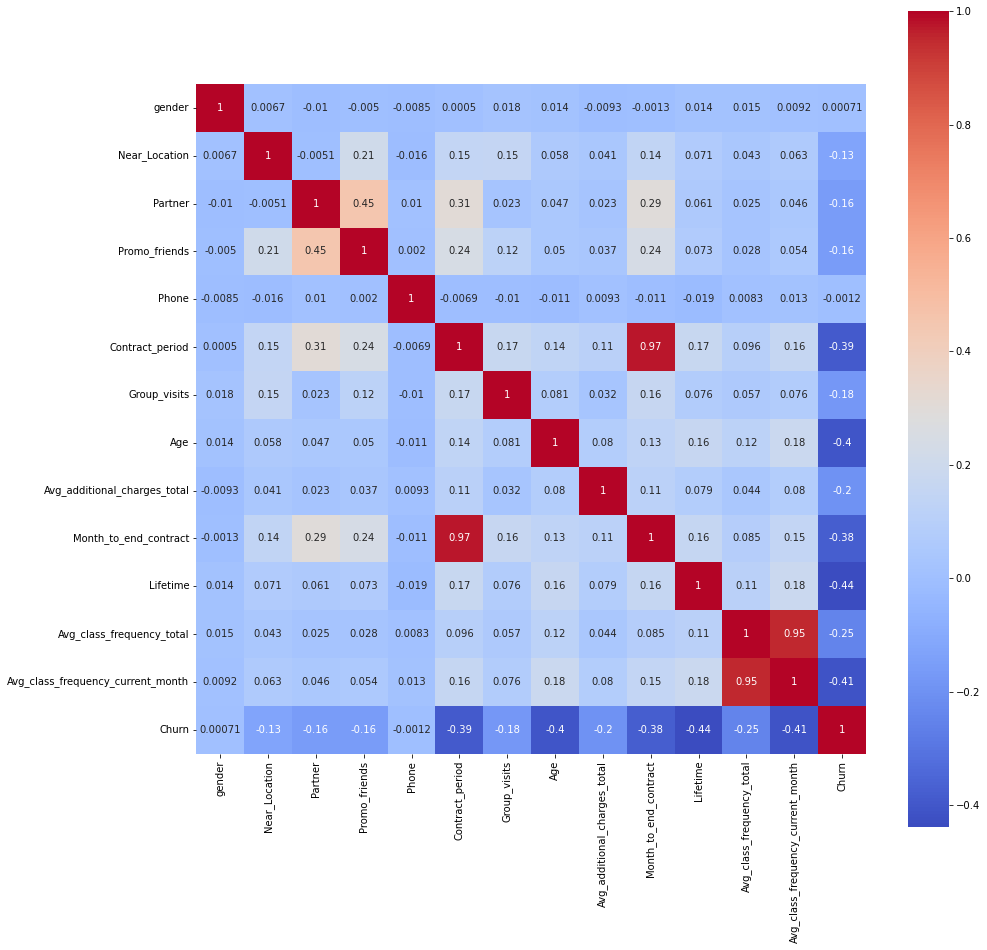

In [10]:
corr_m = df.corr() #Correlation matrix

plt.figure(figsize = (15,15))
sns.heatmap(corr_m, square = True, annot = True, cmap='coolwarm')# draw a heatmap

plt.show()

Negative correlation is most correlated with Age, life cycle, least frequent visit, and how much is left before the end of the contract. Everything that I already in general also called above. And negative correlation means that the larger the parameter, the less the person falls off. It is noticeable that the correlation is stronger in the current month than in the previous one.

The months until the end of the contract and the contract period show a high level of multicollinearity. As well as the frequency of visits current to the frequency of visits to the total, these are all interconnected indicators. However, they are not as significantly correlated with churn. I would even say that they moderately correlate with churn. And averaging may not be such a significant principle.

Multicollinearity can have an effect if two parameters are not only related, but also correlate significantly with the desired parameter. And when one parameter correlates by 0.25, and the second by 0.4, it may not be. Strong influence.  
To do this, Lasso or Ridge Adjustment is carried out, and theoretically these methods could be used to control these methods in order to reduce the influence of highly correlated data.  
The Pearson correlation shows only a linear dependence, and the indicators fit on a straight line, and the angle of this straight line will be the value of the correlation. Inversely proportional values are the values of the criterion.  
At values close to zero, one cannot speak of the absence of a connection, since the form of the dependence may be nonlinear. From sinusoid to horseshoe. or different cohorts will end up at different points.  
Correlation does not mean causation, and certainly does not say which parameter is the cause of which.  

It's important to watch the dimensionality, even if the graphs look similar, the horizontal values are completely different. It is important to pay attention to the sharp drop in attendance in the last month. And in general, more than three a week in the previous rarely was.  
Also, lifetime is two months, if a person left for three months, his probability of quitting is significantly reduced.

### Previously, we see such indicators as key:

    -What could be
    The life span of 1 month is the most prominent indicator. So they leave mostly in the first two months

    -The average by the number of visits for the last month has a sharp drop in value to the previous indicator

    - 1.5 times a week, versus twice a week, but in the last month their frequency has dropped to once a month. this could be a good benchmark

    - The share of those who leave and live far away is visually larger than the share of those who live nearby.

    - Athletes from partner companies are more stable and about half of those who continue to walk, while a third of those who have fallen off.

    - Fall off twice as rarely as those that came through the action bring a friend.

    - And those who do not attend group classes are also at risk of leaving our center.

## Churn Prediction Model

Build a binary classification model of customers, where the target feature is the fact that a customer churns in the next month:

     Split the data into training and validation samples using the train_test_split() function.
     Train the model on the train sample in two ways:
         logistic regression,
         random forest.
     Evaluate the accuracy, precision, and recall metrics for both models on the validation set. Compare models with them. Which model performed better based on the metrics?

Don't forget to specify the random_state parameter when splitting the sample and specifying the algorithm.

### Splitting the data into training and validation samples using the train_test_split() function

In [11]:
# split our data into features (matrix X) and target variable (y)
X = df.drop(columns=['Churn'], axis= 1)
y = df['Churn']

# split the model into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Training a model on a train-sample by logistic regression

In [12]:
#LogisticRegression()
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)
# binary forecast
predictions_lr = model.predict(X_test)

### Training a model on a train sample with a random forest.

In [13]:
#DecisionTreeClassifier()
model_tree = DecisionTreeClassifier(random_state=0)
model_tree.fit(X_train, y_train)
# binary forecast
predictions_rf = model.predict(X_test)

### Evaluation of the accuracy, precision and recall metrics for both models on the validation set.

In [14]:
print('Logistic regression')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_lr)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_lr)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_lr)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_lr)))

Logistic regression
Accuracy: 0.92
Precision: 0.86
Recall: 0.84
F1: 0.85


In [15]:
print('Random forest')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_rf)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_rf)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_rf)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_rf)))

Random forest
Accuracy: 0.92
Precision: 0.86
Recall: 0.84
F1: 0.85


A fairly good level of prediction was shown by both models. We can confidently say that the probability of predicting the outflow with a probability of 93%. This means that we can find the key blocks of what is needed.

In [16]:
probabilities_lr = model.predict_proba(X_test)[:,1]
probabilities_rt = model_tree.predict_proba(X_test)[:,1]
# output roc_auc_score
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_lr)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_rt)))

ROC_AUC: 0.97
ROC_AUC: 0.87


The attribution vector score to value 1 is higher in the linear regression model. Maybe she's just more curved. But maybe closer.


And if we shift the probability curve a little, since our distribution is not 50:50

In [17]:
# set the threshold
threshold = 0.7

# and based on the probabilities and the ratio of classes, we calculate predict
custom_predictions = [0 if i < threshold else 1 for i in probabilities_lr]

# display all the studied metrics for forecasting by a new threshold
print('Metrics for forecasting with a custom threshold')
print(
    'Accuracy for custom: {:.2f}'.format(
        accuracy_score(y_test, custom_predictions)
    )
)
print(
    'Precision for custom: {:.2f}'.format(
        precision_score(y_test, custom_predictions)
    )
)
print(
    'Recall for custom: {:.2f}'.format(
        recall_score(y_test, custom_predictions)
    )
)
print('F1 for custom: {:.2f}'.format(f1_score(y_test, custom_predictions)))

Metrics for forecasting with a custom threshold
Accuracy for custom: 0.92
Precision for custom: 0.95
Recall for custom: 0.74
F1 for custom: 0.83


Slightly shifting the indicator, you can achieve the same level of accuracy predictability, but we significantly increase Precision, because it is possible that we will spend additional funds and resources on customer retention. We will look for a personal approach. And these are additional conditions and resources.

Accuracy is not the main idea cos Our sample of 25% is not evenly distributed, this part of people leaving fitness, so I can guess with a probability of 75% just consider everyone left))

If retention costs are lower, then it is better to retest and then it is more important to pay attention to recall so as not to miss anyone.

In [18]:
# set the threshold
threshold = 0.7

# and based on the probabilities and the ratio of classes, we calculate predict for random forest
custom_predictions = [0 if i < threshold else 1 for i in probabilities_rt]

# display all the studied metrics for forecasting by a new threshold
print('Metrics for forecasting with a custom threshold')
print(
    'Accuracy for custom: {:.2f}'.format(
        accuracy_score(y_test, custom_predictions)
    )
)
print(
    'Precision for custom: {:.2f}'.format(
        precision_score(y_test, custom_predictions)
    )
)
print(
    'Recall for custom: {:.2f}'.format(
        recall_score(y_test, custom_predictions)
    )
)
print('F1 for custom: {:.2f}'.format(f1_score(y_test, custom_predictions)))

Metrics for forecasting with a custom threshold
Accuracy for custom: 0.90
Precision for custom: 0.82
Recall for custom: 0.80
F1 for custom: 0.81


For a decision tree, this is not a working scheme)) But let's draw a tree.

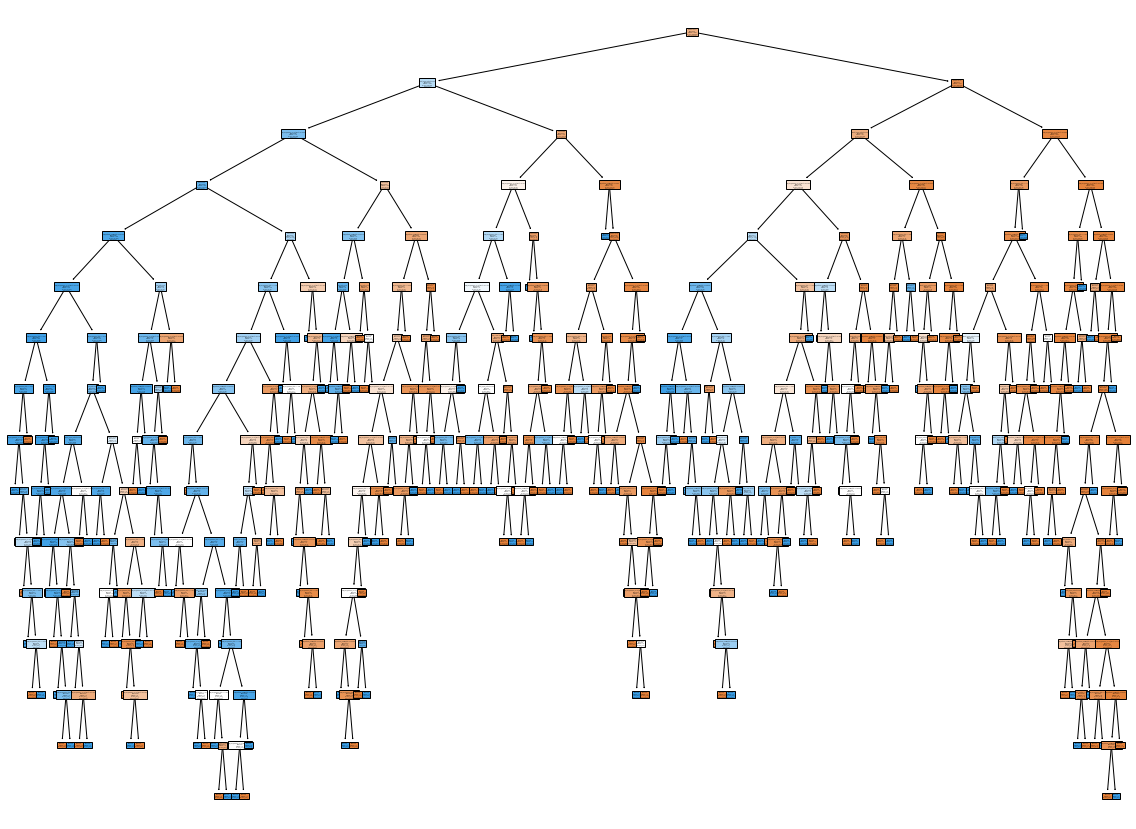

In [19]:

plt.figure(figsize = (20,15)) #set the size of the figure to get a large image
plot_tree(model_tree, filled=True, feature_names = X_train.columns, class_names = ['not fault', 'fault'])
plt.show() 

## Client clustering

### Data standardization

In [20]:
sc = StandardScaler()
x_sc =  sc.fit_transform(df) #We standardize the entire sample

In [21]:

# create an object of the StandardScaler class and apply it to the training sample
scaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train
)  # train scaler and simultaneously transform the matrix for the training sample

# apply standardization to the feature matrix for the test sample
X_test_st = scaler.transform(X_test)

### Let's build a distance matrix using the linkage() function on a standardized feature matrix and draw a dendrogram. 
**Attention: drawing a dendrogram may take time!**

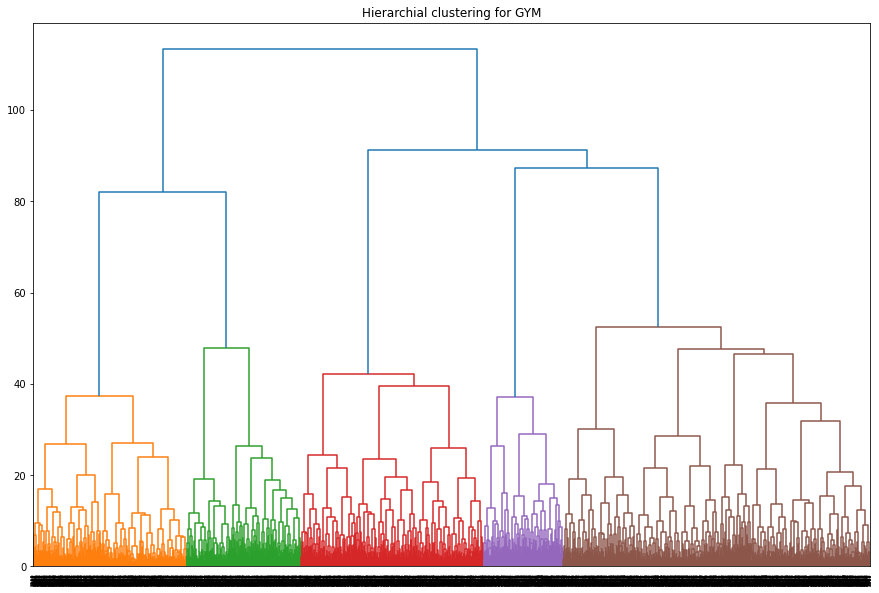

In [22]:

from scipy.cluster.hierarchy import dendrogram, linkage
# mandatory data standardization before working with algorithms
sc = StandardScaler()
X_sc = sc.fit_transform(df)
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()


Well, the machine sees 5 clusters. this is probably quite logical. see below.

### Train a clustering model based on the K-Means algorithm and predict customer clusters. 

In [23]:
# set the model k_means with the number of clusters 5 and fix the value of random_state
km =  KMeans(n_clusters=5, random_state=0)
# predict clusters for observations (the algorithm assigns them numbers from 0 to 2)
labels =  km.fit_predict(x_sc)

# save the cluster labels into dataset
df['cluster_km']= labels

In [24]:
df.groupby('cluster_km')['Age'].agg('count')

cluster_km
0     544
1     767
2     821
3    1180
4     688
Name: Age, dtype: int64

Clusters may not be very uniform, for example, the third cluster is twice as large as the zero and fourth. But maybe there's nothing special.

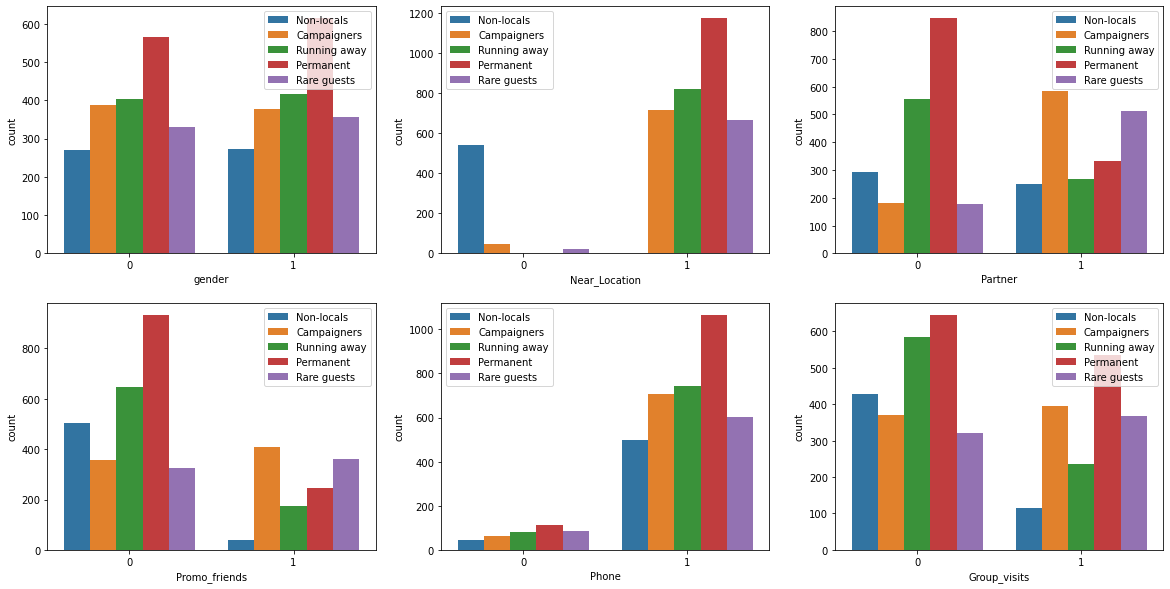

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axes_list = [item for sublist in axes for item in sublist]
for column in df.columns:
    if column in category_columns:
        ax = axes_list.pop(0)
        sns.countplot(x = df[column], data=df, ax=ax, hue=df['cluster_km'])
        ax.legend(['Non-locals', 'Campaigners', 'Running away', 'Permanent', 'Rare guests'])

<Figure size 864x288 with 0 Axes>

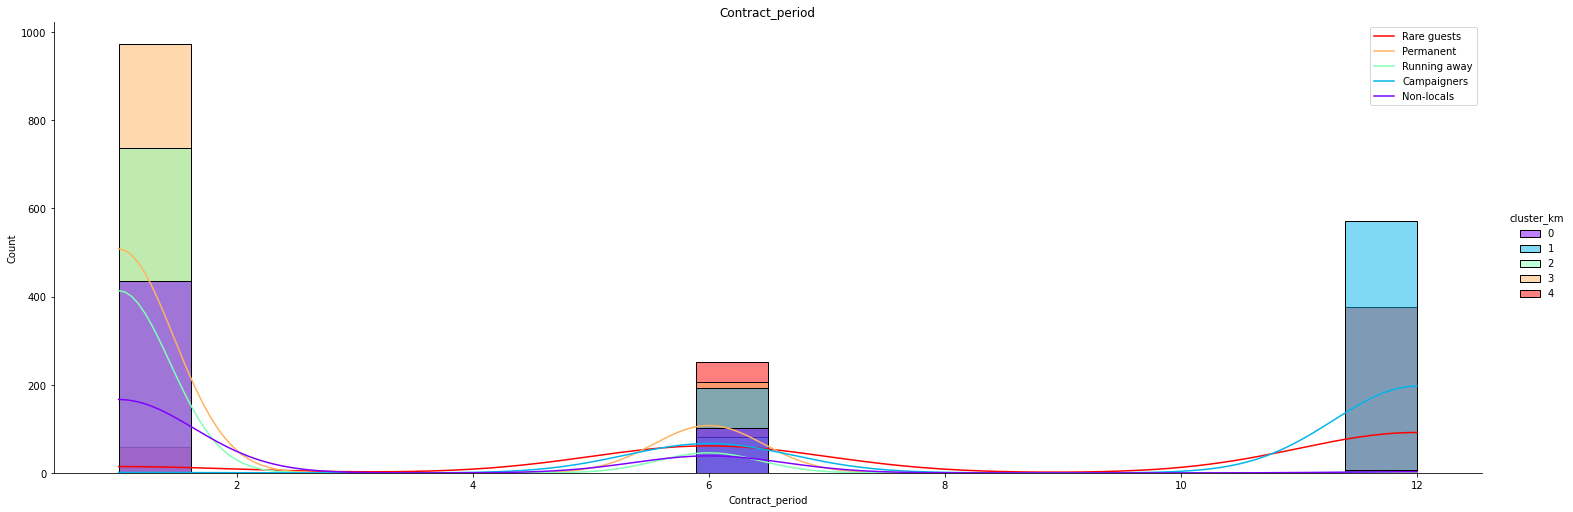

<Figure size 864x288 with 0 Axes>

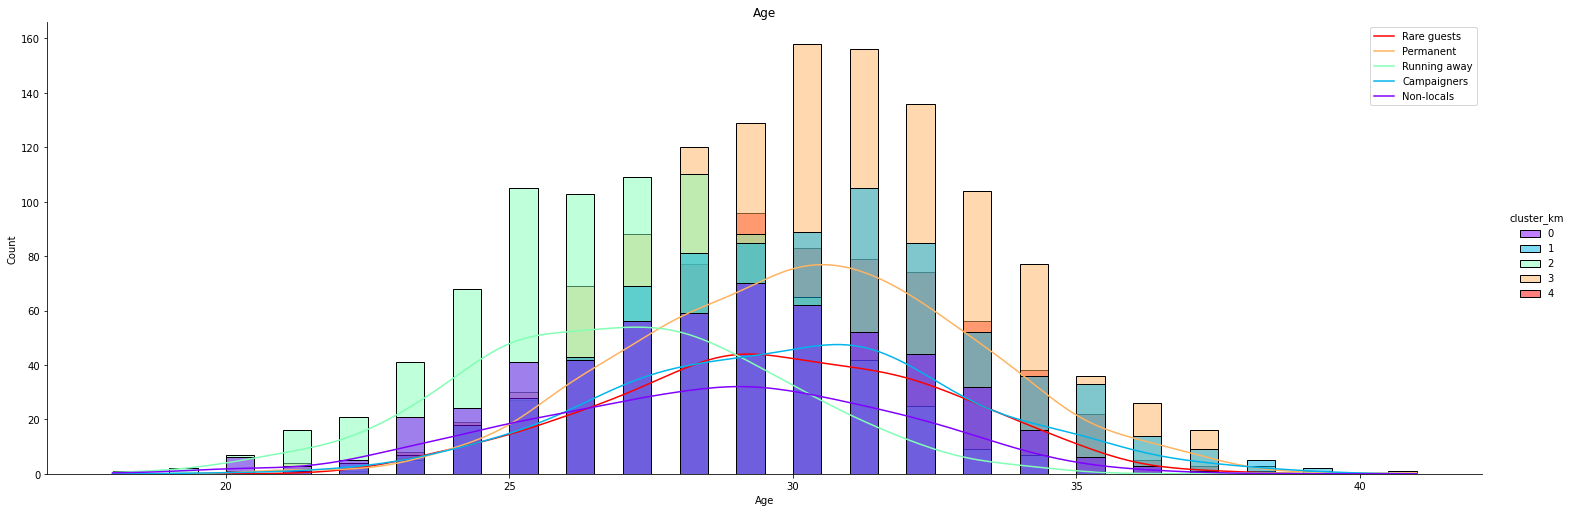

<Figure size 864x288 with 0 Axes>

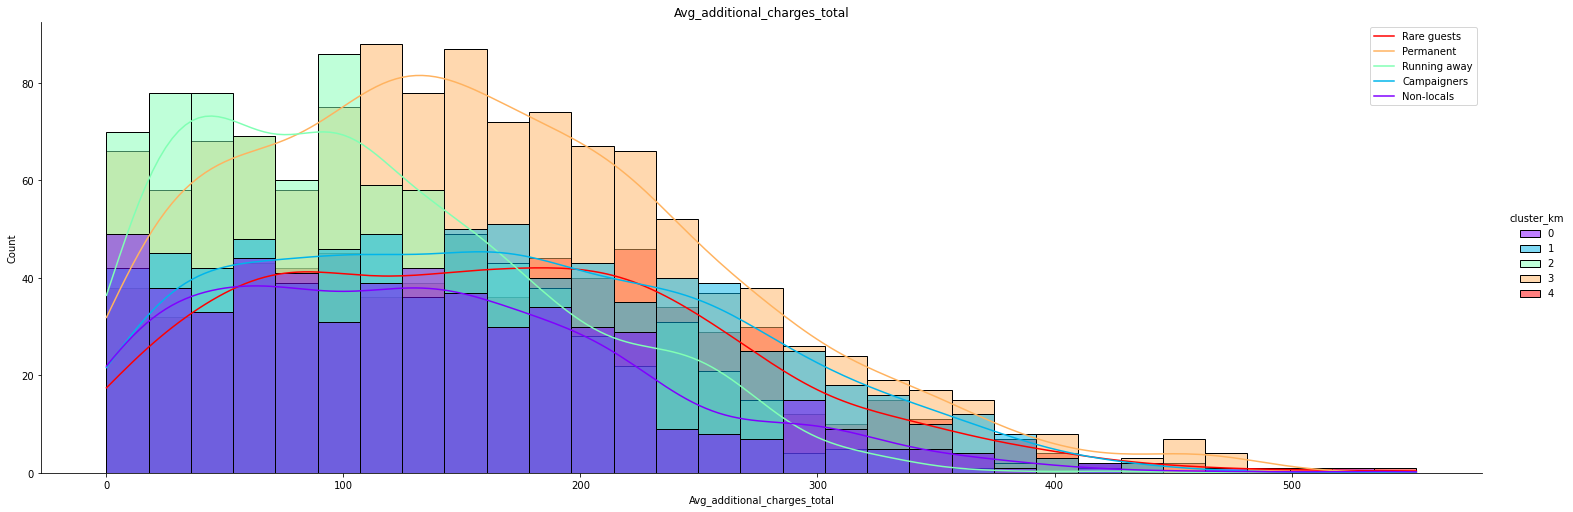

<Figure size 864x288 with 0 Axes>

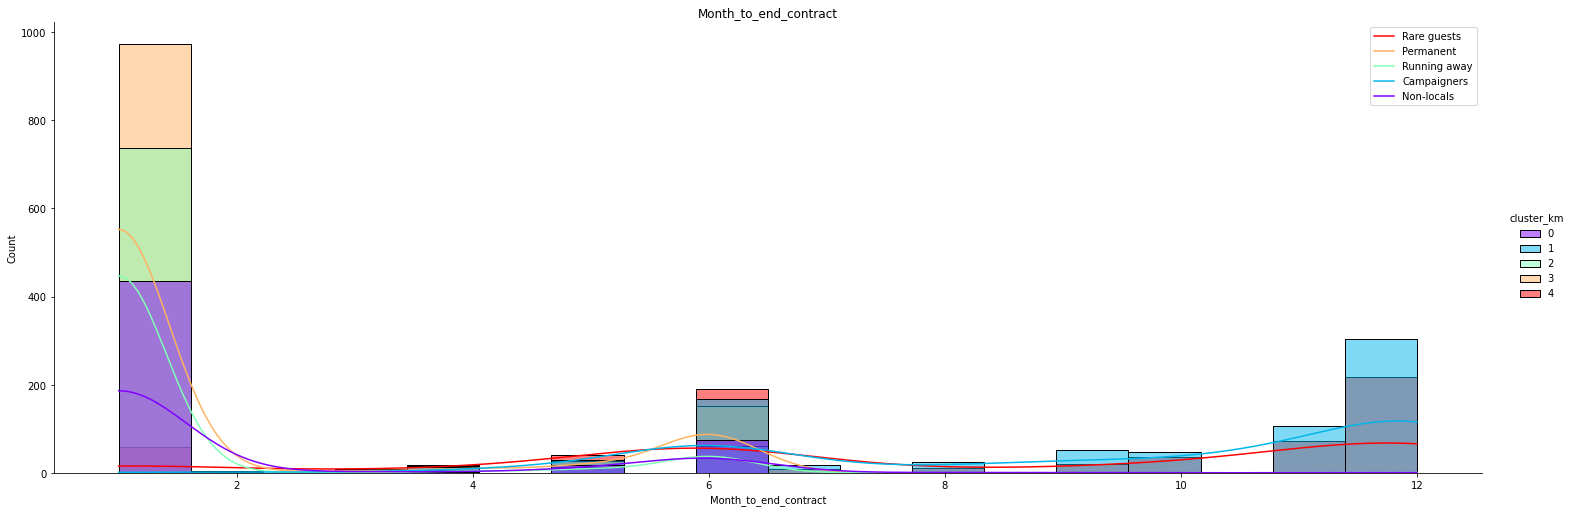

<Figure size 864x288 with 0 Axes>

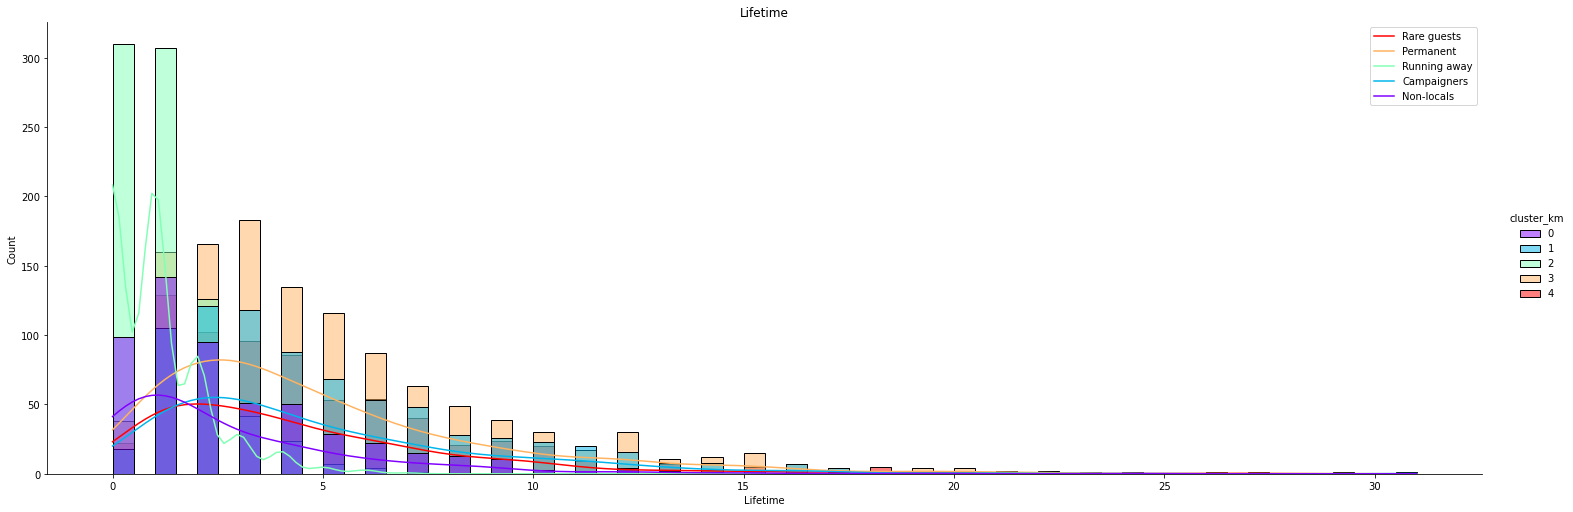

<Figure size 864x288 with 0 Axes>

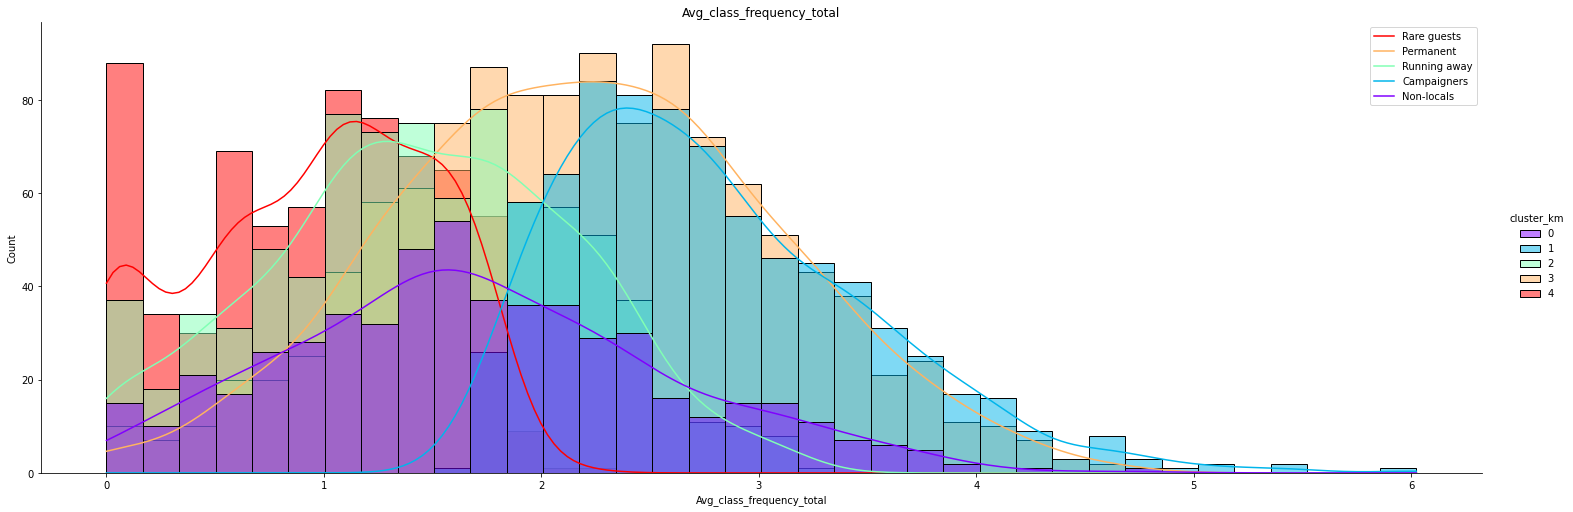

<Figure size 864x288 with 0 Axes>

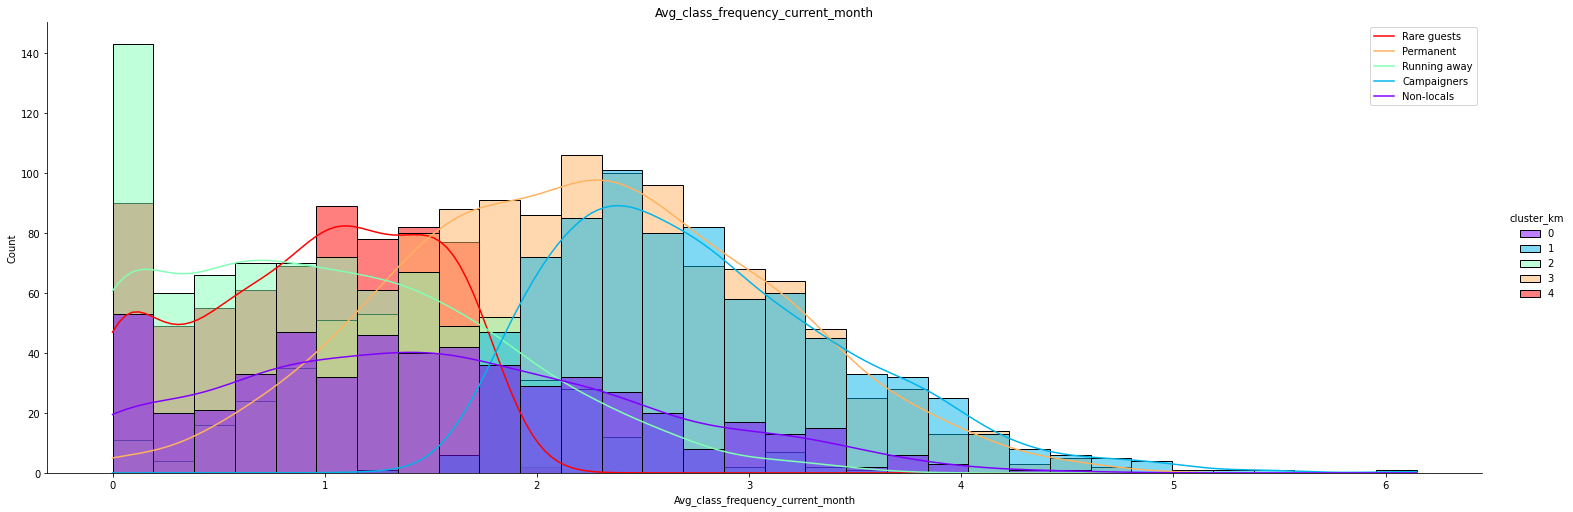

In [26]:
for column in numeric_columns:
    plt.figure(figsize=(12, 4))
    sns.displot(x=df[column], hue='cluster_km', data=df,kde=True, height=7, aspect=3, palette='rainbow')
    plt.title(column)
    plt.legend(['Rare guests', 'Permanent', 'Running away', 'Campaigners', 'Non-locals'])
    plt.show();


### Look at the averages of the features for the clusters

In [27]:
df.groupby('cluster_km').agg('mean')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.503676,0.000000,0.459559,0.075368,0.917279,2.069853,0.211397,28.522059,132.741216,1.950368,2.757353,1.706629,1.515890,0.450368
1,0.492829,0.936115,0.764016,0.534550,0.919166,10.447197,0.516297,29.962190,161.853561,9.477184,4.833116,2.788103,2.786919,0.007823
2,0.507917,1.000000,0.323995,0.213155,0.903776,1.546894,0.287454,26.926918,113.173051,1.500609,1.031669,1.449720,1.037592,0.961023
3,0.521186,0.996610,0.282203,0.208475,0.904237,1.882203,0.452542,30.237288,157.988625,1.794915,4.923729,2.203432,2.207359,0.003390
4,0.518895,0.968023,0.744186,0.526163,0.873547,8.859012,0.534884,29.728198,162.907495,8.155523,4.411337,0.957744,0.943967,0.024709


In [28]:
cluster_features = df.groupby('cluster_km').mean().reset_index()
numeric_columns = cluster_features.drop(columns=['cluster_km']).columns
cluster_features.style.format({i: '{:.2f}' for i in numeric_columns}) \
    .highlight_max(color='yellowgreen', subset=numeric_columns) \
    .highlight_min(color='coral', subset=numeric_columns)

,cluster_km,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.50,0.00,0.46,0.08,0.92,2.07,0.21,28.52,132.74,1.95,2.76,1.71,1.52,0.45
1,1,0.49,0.94,0.76,0.53,0.92,10.45,0.52,29.96,161.85,9.48,4.83,2.79,2.79,0.01
2,2,0.51,1.00,0.32,0.21,0.90,1.55,0.29,26.93,113.17,1.50,1.03,1.45,1.04,0.96
3,3,0.52,1.00,0.28,0.21,0.90,1.88,0.45,30.24,157.99,1.79,4.92,2.20,2.21,0.00
4,4,0.52,0.97,0.74,0.53,0.87,8.86,0.53,29.73,162.91,8.16,4.41,0.96,0.94,0.02


In [29]:
cluster_features.T.style.background_gradient(cmap='coolwarm', axis=1).set_precision(2)

C:\Users\Пирожки\AppData\Local\Temp\ipykernel_2176\793093793.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cluster_features.T.style.background_gradient(cmap='coolwarm', axis=1).set_precision(2)


,0,1,2,3,4
cluster_km,0.00,1.00,2.00,3.00,4.00
gender,0.50,0.49,0.51,0.52,0.52
Near_Location,0.00,0.94,1.00,1.00,0.97
Partner,0.46,0.76,0.32,0.28,0.74
Promo_friends,0.08,0.53,0.21,0.21,0.53
Phone,0.92,0.92,0.90,0.90,0.87
Contract_period,2.07,10.45,1.55,1.88,8.86
Group_visits,0.21,0.52,0.29,0.45,0.53
Age,28.52,29.96,26.93,30.24,29.73
Avg_additional_charges_total,132.74,161.85,113.17,157.99,162.91


There are two distinct groups that lead to customer churn.  
The first group, referred to as "*Non-locals*," consists of individuals from a different district who have never been referred by friends, attend group classes infrequently, and have a two-month contract with two months remaining. Their average lifecycle is 2.7 months, and they attend on average 1.7 times a week, but before churning, their attendance drops to 1.5 times a week. The probability of them leaving the club is 45%.  
It is crucial to socialize and engage with this group, help them find a sense of community, and retain their membership.

The second group, labeled as "*Runaways*," represents the riskiest candidates for churn. Their likelihood of continuing their membership sharply declines. In the previous month, they managed an average of 1.5 visits per week, but in the current month, it reduces to one visit per week, and it's highly likely to be their last. They live nearby and often prioritize sedentary activities or indulging in alcohol while watching TV instead of participating in sports. One-third of them are corporate clients, and 20% joined through a friend's referral. Their average contract duration is 1.5 months, indicating that their purchase might have been impulsive. They churn within a month.  
To retain such clients, it is crucial to overcome the barriers that discourage their active lifestyle and provide support to break their habitual cycle. Encouraging them to attend more frequently, up to three times a week, for a month can be effective. This might require some investment, but it is known that individuals who attend three times a week rarely churn. Additionally, providing incentives for regular attendance, such as a free juice or protein bar for every third weekly workout, can reinforce their commitment.

There is also a fourth group, labeled as "*Rare guests*," who visit the fitness center infrequently but have long-term contracts. There is a chance that they might stop attending, so it is important to evaluate these customers and potentially re-engage them with targeted efforts.

## Conclusions and Basic Recommendations for Customer Management

A quarter of our new customers, equivalent to 26.5%, discontinue their visits and stop attending our fitness center. On average, they churn within the first two months, significantly reducing the lifetime value of our clients and diminishing the return on investment from acquiring new customers. Therefore, this study is relevant and worthwhile.

**Data and Research Methods:**  
We gathered customer survey data, as well as information from attendance logs, purchases, and current membership status. Two machine learning models, Random Forest and Logistic Regression, were used for preparation.

To prepare for clustering, we used a dendrogram, which divided our sample into five clusters. For the clustering itself, we utilized the K-Means model.

**Key Findings**

The lifetime value for newcomers is two months, and if a person continues for three months, their likelihood of churning decreases significantly. Therefore, it is crucial to closely monitor those who engage in activities during their first two months and place them under the supervision of the marketing department.

Pay attention to the sharp decline in attendance during the last month. Typically, the frequency of visits rarely exceeds three times a week. One potential idea is to motivate and encourage people to attend the fitness center three to four times a week. This will help them establish a workout habit and potentially interact with familiar faces, as social influence plays a role as well. Therefore, I recommend developing a plan to provide special workout tracking cards to new clients for the first two months. By completing the weekly workout plan, they can earn rewards such as fitness drinks, energy bars, or protein shakes. At the end of the month or two, we can observe if the average overall frequency differs noticeably, such as 1.5 times a week compared to two times a week. Additionally, their frequency drops to once a month in the final month, which can be a significant indicator.   

If we observe that the average lifecycle is one month, we can assume two groups: those who are newcomers and won't renew their membership. They are generally younger, less likely to attend group classes, and have three times fewer months remaining on their contract compared to those who continue. However, we cannot be certain if someone who purchased an annual membership will continue attending until the end. They also tend to live slightly farther away (76% versus 87%).    

Athletes from partner companies show more stability, with approximately half of them continuing to attend compared to only a third of those who churn.  
Individuals who joined through a "bring a friend" promotion churn at half the rate of others.



With our current models, we can predict churn with a relatively high accuracy of 92-93% and a probability of correctly identifying a person who will churn at 94%. These findings should be validated in the following month. One recommendation is to utilize the predictive machine learning model to create conditions for those who are already close to leaving our fitness center. We can compile a list and send them personalized SMS offers, which will depend on the marketing department's strategies. One potential approach could involve offering a personal training session (which is costly for us but provides an opportunity for individuals to experience personal attention and motivates them for further achievements). Additionally, this allows us to tailor potential clients for personal trainers.

**We have five clusters, and special attention should be given to two:** Cluster 0 (*"Non-locals"*) and Cluster 2 (*"Runaways"*). 3 other clusters are 1 - *'Campany's'*, 3-*'Permanent'*, 4-*'Rare guests'*

**"Non-locals"** include those from a different district who have never joined through a friend's referral, attend group classes less frequently, have a two-month contract, and have two months remaining on their membership. Their average lifecycle is 2.7 months, and they attend 1.7 times a week, but before churning, they visit 1.5 times a week. The likelihood of them leaving the club is 45%. Ideally, we should focus on socializing them, helping them find a group, and assisting them in making connections. Otherwise, they might question their presence at our center.

**"Runaways"** are the riskiest candidates, with their likelihood of continuing dropping rapidly. In the previous month, they managed around 1.5 visits per week, but in the current month, it's reduced to one visit per week, and it's highly likely to be their last. They live nearby and tend to prioritize staying on the couch or having a beer while watching TV instead of participating in sports activities. A third of them are corporate clients, and 20% joined through a friend's referral. Their average contract duration is 1.5 months, suggesting that their purchase might have been impulsive. They churn within a month. To retain such clients, we need to win the battle against everything that surrounds them and compels them to live their usual lifestyle.

Recommendations  

Support their motivation and help them break free from the vicious circle. Encourage newcomers to attend more frequently, up to three times a week, for a month. This might require some investment on our part, but we know that those who attend three times a week rarely churn. Help individuals make exercise a habitual part of their lives. Perhaps offer incentives, such as a free juice, protein bar, or something that provides confirmation for every third weekly workout.